# 17장. 결정 트리 (Decision Tree)

## 1. 패키지 설치

### 1.1 머신 러닝 패키지 scikit-learn

In [1]:
!pip install sklearn

### 1.2 시각화 패키지 graphviz
* 바이너리 설치 : https://graphviz.org/download/
* 패키지 설치

In [2]:
!pip install graphviz

## 2. 데이터셋

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
%matplotlib inline

### 2.2 데이터셋 로딩

In [4]:
import requests
import os

dataset_path = os.path.join('data', 'iris.data')
if os.path.exists(dataset_path) is False:
    data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
    with open(dataset_path, "w") as f:
      f.write(data.text)

In [5]:
import pandas as pd

column_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
class_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
dataset = pd.read_csv(dataset_path, names=column_names)
dataset.sample(5)

,sepal length,sepal width,petal length,petal width,species
127,6.1,3.0,4.9,1.8,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor


In [6]:
X = dataset[dataset.columns[:-1]]
dataset['target'] = (dataset['species']=='Iris-setosa')*0 + \
                   (dataset['species']=='Iris-virginica')*1 + \
                   (dataset['species']=='Iris-versicolor')*2
y = dataset['target']
dataset.sample(5)

,sepal length,sepal width,petal length,petal width,species,target
69,5.6,2.5,3.9,1.1,Iris-versicolor,2
62,6.0,2.2,4.0,1.0,Iris-versicolor,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
39,5.1,3.4,1.5,0.2,Iris-setosa,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,2


### 2.3 데이터 분할

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

## 3. 데이터 탐색

### 3.1 레이블 별 특징 분포 그래프

In [8]:
def plot_feature_by_label(dataframe, feature_name, label_name, title):
    sns.set_style("whitegrid")
    ax = sns.FacetGrid(dataframe, hue=label_name,aspect=2.5)
    ax.map(sns.kdeplot,feature_name,shade=True)
    ax.set(xlim=(0, dataframe[feature_name].max()))
    ax.add_legend()
    ax.set_axis_labels(feature_name, 'proportion')
    ax.fig.suptitle(title)
    plt.show()

### 3.2 특징 별 분포

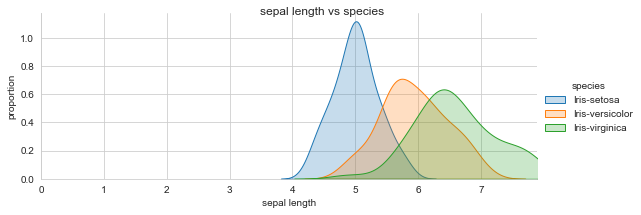

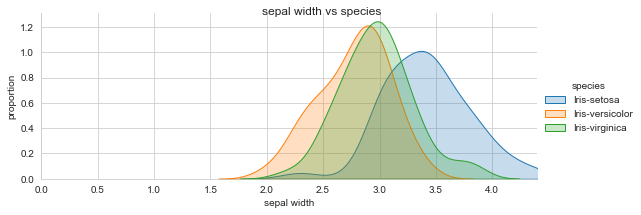

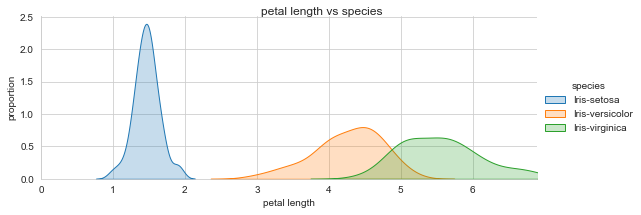

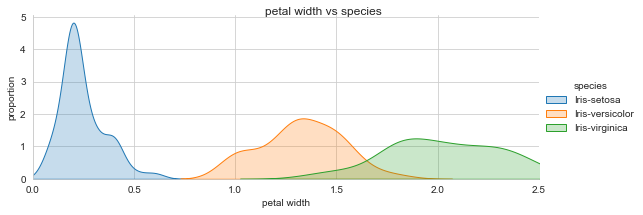

In [9]:
for feature_name in X.keys():
    plot_feature_by_label(dataset, feature_name, 'species', feature_name + ' vs species')

## 4. 특징 선택 (Feature Selection)

### 4.1 원래의 특징

#### 4.1.1 히트맵으로 상관관계 확인

<AxesSubplot:>

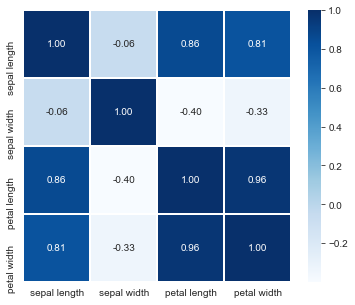

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(X_train.corr(), linewidths=.5, annot=True, fmt=".2f", cmap='Blues')

### 4.2 특징 선택 (Feature Selection)

In [11]:
dataset2 = dataset.drop(['sepal length', 'sepal width'], axis=1)

#### 4.2.2 히트맵으로 상관성 재확인

<AxesSubplot:>

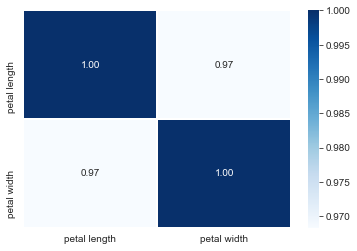

In [12]:
X2 = dataset2[dataset2.columns[:-2]]
y2 = dataset2.target
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.2)
sns.heatmap(X_train2.corr(), linewidths=.5, annot=True, fmt=".2f", cmap='Blues')

### 4.3 특징 추출 (Feature Extraction)

#### 4.3.1 PCA 차원 축소

In [13]:
from sklearn.decomposition import PCA
X3,y3 = X,y
variance_pct = 2
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X3,y3) # Transform the initial features

#### 4.3.2 히트맵으로 상관성 재확인

<AxesSubplot:>

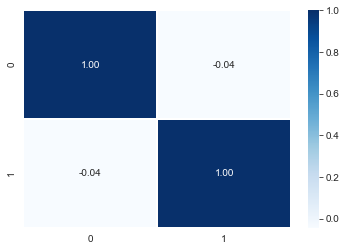

In [14]:
X3pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)
sns.heatmap(X_train3.corr(), linewidths=.5, annot=True, fmt=".2f", cmap='Blues')

## 5. 모델 훈련 및 성능 비교

### 5.1 세 모델 훈련

In [15]:
clf1 = tree.DecisionTreeClassifier(max_depth=2,min_samples_leaf=12)
clf1.fit(X_train, Y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=2,min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)
clf3 = tree.DecisionTreeClassifier(max_depth=2,min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=12)

### 5.2 세 모델의 성능

In [16]:
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, Y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

Accuracy of Decision Tree classifier on original training set: 0.97
Accuracy of Decision Tree classifier on original test set: 0.93
Accuracy of Decision Tree classifier on reduced training set: 0.97
Accuracy of Decision Tree classifier on reduced test set: 0.93
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.94
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.97


## 6. 의사 결정 트리 및 주요 특징 시각화

### 6.1 세 모델의 특징 이름

In [17]:
feature_names1 = X.columns.values
feature_names2 = X2.columns.values
feature_names3 = X3pca.columns.values # [0 1 2 3 4]

### 6.2 원래의 특징

#### 6.2.1 의사 결정 트리

In [18]:
def plot_decision_tree(tree_clf, feature_names, target_names):
    dot_data = tree.export_graphviz(
                            tree_clf,
                            out_file=None, 
                            feature_names=feature_names,  
                            class_names=target_names,
                            filled=False,
                            rounded=True,  
                            special_characters=False)
    graph = graphviz.Source(dot_data)  
    return graph 

In [19]:
plot_decision_tree(clf1,feature_names1, class_names)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### 5.1.2 주요 특징 확인

In [20]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    plt.show()

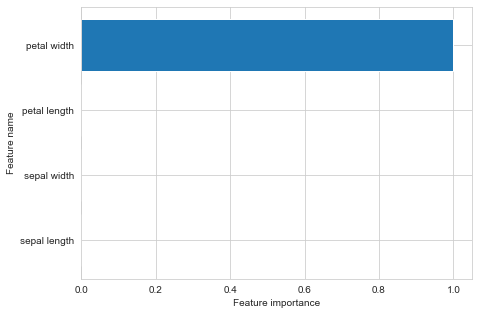

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
plot_feature_importances(clf1, feature_names1)

### 6.3 특징 선택 (Feature Selection)

#### 6.3.1 의사 결정 트리

In [22]:
plot_decision_tree(clf2,feature_names2, class_names)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### 6.3.2 주요 특징

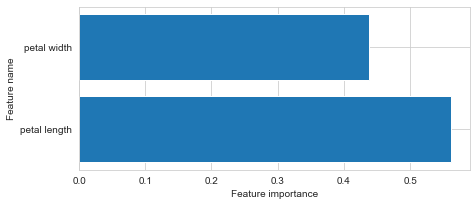

In [23]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_feature_importances(clf2, feature_names2)

### 6.4 특징 추출 (Feature Extraction)

#### 6.3.1 의사 결정 트리

In [24]:
plot_decision_tree(clf3,feature_names3, class_names)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### 6.4.2 주요 특징

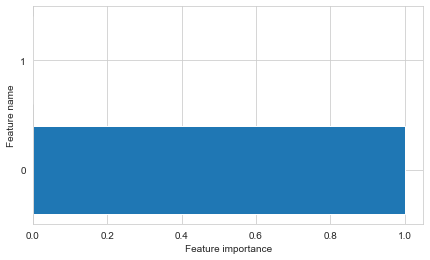

In [25]:
fig, ax = plt.subplots(figsize=(7, 4))
plot_feature_importances(clf3, feature_names3)

## 7. 랜덤 포레스트

### 7.1 학습 곡선 그래프

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

### 7.2 혼동 행렬 그래프

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
dict_characters = {0: 'Iris-setosa', 1: 'Iris-virginica', 2: 'Iris-versicolor'}

### 7.3. 모델 훈련

In [29]:
(X1, y1) = (X, y)
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,y1,random_state=0)
clf = RandomForestClassifier(max_features=4,random_state=0)
clf.fit(X_train1,Y_train1)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train1,Y_train1)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test1,Y_test1)))

Accuracy of Random Forest Classifier on training data: 1.00
Accuracy of Random Forest Classifier on testing data: 0.97


### 7.4. 모델 평가 (정확도 97%)

In [30]:
model = clf
prediction = model.predict(X_test1)
cnf_matrix = confusion_matrix(Y_test1, prediction)

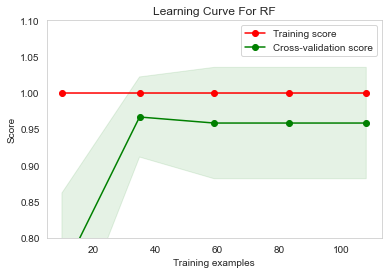

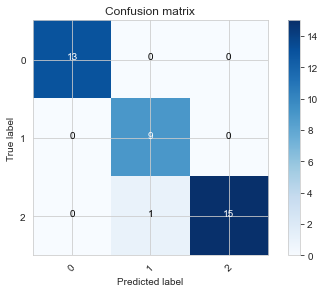

In [31]:
plot_learning_curve(model, 'Learning Curve For RF', X_train, Y_train, (0.80,1.1), 10)
plt.show()
plot_confusion_matrix(cnf_matrix, classes=dict_characters, title='Confusion matrix')
plt.show()